In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.size'] = 10

from scipy.io import loadmat
from scipy.signal import stft
from scipy.stats import kurtosis

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [22]:
# Path to the directory
path = '../data'

# List all files in the directory
fname = os.listdir(path)

# Convert to numpy array
fname = np.asarray(fname)

print(fname)

['data-20130307T015746Z.mat' 'data-20130308T023421Z.mat'
 'data-20130309T023343Z.mat' 'data-20130310T030102Z.mat'
 'data-20130311T030024Z.mat' 'data-20130312T061710Z.mat'
 'data-20130313T063404Z.mat' 'data-20130314T065041Z.mat'
 'data-20130315T065003Z.mat' 'data-20130316T065643Z.mat'
 'data-20130317T065604Z.mat' 'data-20130317T184756Z.mat'
 'data-20130318T184715Z.mat' 'data-20130320T003354Z.mat'
 'data-20130321T003314Z.mat' 'data-20130322T003950Z.mat'
 'data-20130323T003911Z.mat' 'data-20130324T004549Z.mat'
 'data-20130325T004512Z.mat' 'data-20130326T014150Z.mat'
 'data-20130327T035827Z.mat' 'data-20130328T095531Z.mat'
 'data-20130329T095505Z.mat' 'data-20130330T100142Z.mat'
 'data-20130331T193818Z.mat' 'data-20130401T193739Z.mat'
 'data-20130402T194415Z.mat' 'data-20130403T212942Z.mat'
 'data-20130404T212901Z.mat' 'data-20130405T213537Z.mat'
 'data-20130406T221209Z.mat' 'data-20130407T221131Z.mat'
 'data-20130408T221809Z.mat' 'data-20130409T231445Z.mat'
 'data-20130410T231407Z.mat' 'd

In [23]:
df = []
for i in fname:
    df.append(loadmat('../data/' + i)['vibration'].flatten())
    
df = np.asarray(df)
fs = int(df.shape[1] / 6.0)
t = np.linspace(0.0,6.0,df.shape[1])

print('Scan frequency: {:,d} Hz'.format(fs))

Scan frequency: 97,656 Hz


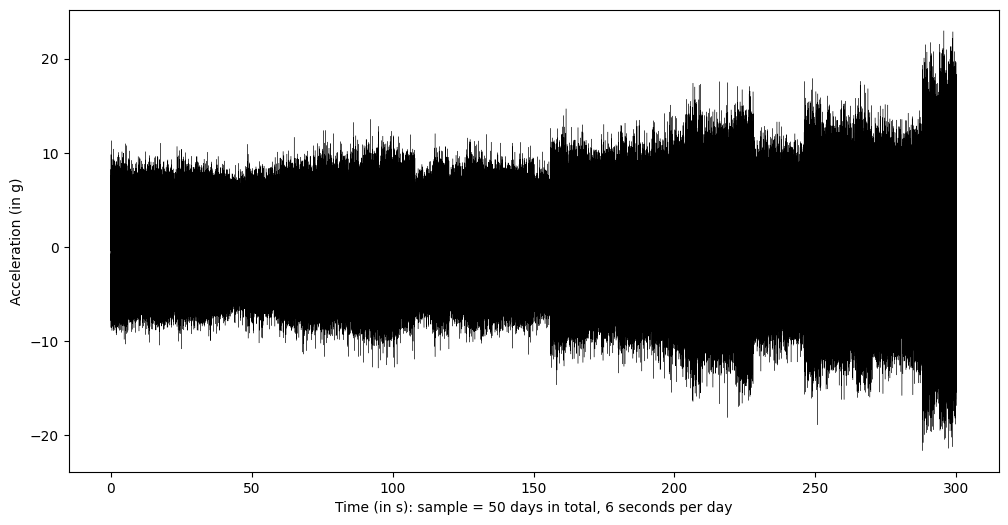

In [24]:
plt.subplots(figsize = (12.0,6.0))
for i in range(df.shape[0]):
    plt.plot(t + i * 6.0,df[i],color = 'black',lw = 0.25)

plt.xlabel('Time (in s): sample = 50 days in total, 6 seconds per day')
plt.ylabel('Acceleration (in g)')    
plt.show()

In [25]:
f = []
fft = []

wnd = 127

for i in range(df.shape[0]):
    u,v,w = stft(df[i],fs,nperseg = wnd,noverlap = int(0.8 * wnd),nfft = int(2.0 * wnd))
    f.append(u)
    fft.append(kurtosis(np.abs(w),fisher = False,axis = 1))

f = np.asarray(f)
fft = np.asarray(fft)

fftn = (fft - fft.min()) / (fft.max() - fft.min())

fftn = np.asarray(fftn)
n = np.ones_like(f[0])

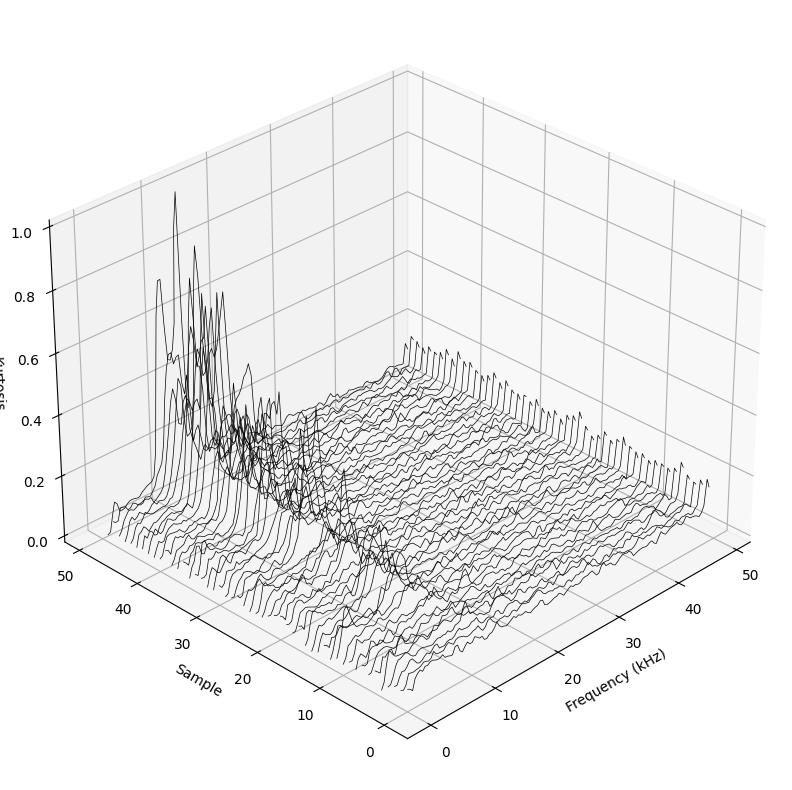

In [26]:
fig = plt.figure(figsize = (10.0,10.0))
ax = plt.axes(projection = '3d')
ax.view_init(30,225)
for i in range(f.shape[0]):
    ax.plot(f[i] / 1.0e3,i * n,fftn[i],color = 'black',linewidth = 0.50)

ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Sample')
ax.set_zlabel('Kurtosis')
plt.show()

In [27]:
X = fftn
X = X.reshape(-1,f.shape[1],1)
y = np.zeros(X.shape[0],dtype = int)
y[-15:] = 1

print('Input shape: {:d} samples x {:d} registers/sample'.format(X.shape[0],X.shape[1]))

Input shape: 50 samples x 128 registers/sample


In [28]:
print(df.shape)

(50, 585936)


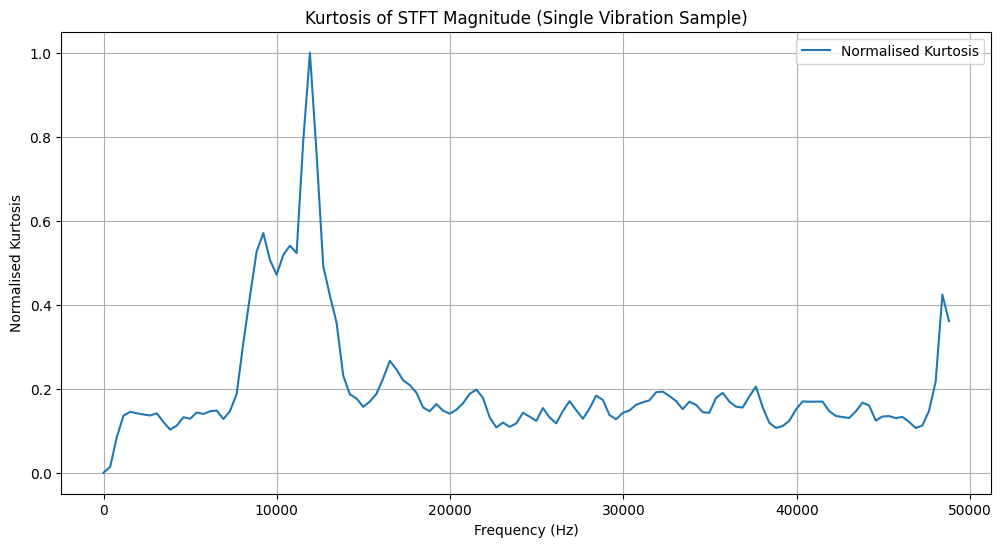

In [34]:
# Parameters
fs = int(585396/6.0)  # Sampling frequency (adjust as per your dataset)
wnd = 127  # Window size for STFT
noverlap = int(0.8 * wnd) if int(0.8 * wnd) < wnd else wnd - 1  # Ensure noverlap < nperseg

# Example: Single vibration sample
# Replace this with an actual single vibration sample from your dataset
vibration_sample = df[40][:]  # Shape: (585396,)

# Compute STFT for the single sample
frequencies, times, stft_matrix = stft(
    vibration_sample,
    fs,
    nperseg=wnd,
    noverlap=noverlap,
    nfft=int(2.0 * wnd)
)

# Calculate kurtosis for each frequency bin
kurtosis_values = kurtosis(np.abs(stft_matrix), fisher=False, axis=1)

# Normalize Kurtosis
kurtosis_normalized = (kurtosis_values - kurtosis_values.min()) / (kurtosis_values.max() - kurtosis_values.min())

# Plot the normalized kurtosis
plt.figure(figsize=(12, 6))
plt.plot(frequencies, kurtosis_normalized, label="Normalised Kurtosis")
plt.title("Kurtosis of STFT Magnitude (Single Vibration Sample)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalised Kurtosis")
plt.legend()
plt.grid(True)
plt.show()